Columns in dataset: Index(['id', 'period', 'treatment', 'x1', 'x2', 'x3', 'x4', 'age', 'age_s',
       'outcome', 'censored', 'eligible'],
      dtype='object')


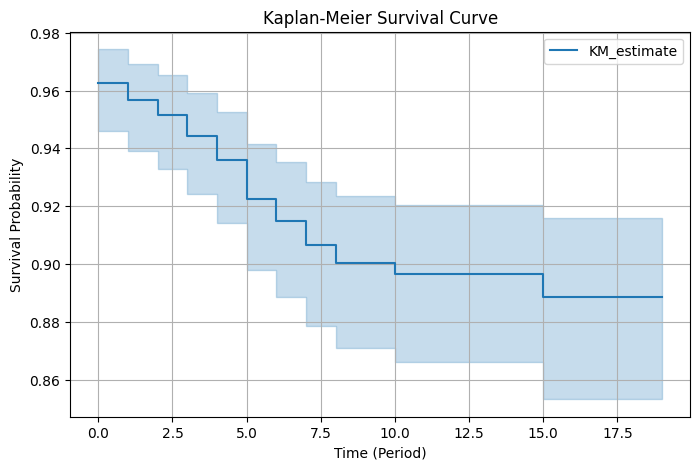

c:\Xavier Paul (School Works)\Computer Science\3rd year\3203 Data Analytics\assignment3\.venv\Lib\site-packages\lifelines\utils\__init__.py:1120: ConvergenceWarning: Column censored have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, 'censored'].var())
>>> print(df.loc[~events, 'censored'].var())

A very low variance means that the column censored completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = r"C:\Xavier Paul (School Works)\Computer Science\3rd year\3203 Data Analytics\assignment3\data_censored.csv"
df = pd.read_csv(file_path)

# Define column names (ensure these match your dataset!)
duration_col = "period"  # Replace with actual time column name
event_col = "censored"   # Replace with actual event column (1=event occurred, 0=censored)

# Check column names
if duration_col not in df.columns or event_col not in df.columns:
    raise ValueError(f"ERROR: Column names are incorrect! Check: {df.columns}")

# Convert to numeric (if necessary)
df[duration_col] = pd.to_numeric(df[duration_col], errors="coerce")
df[event_col] = pd.to_numeric(df[event_col], errors="coerce")

# Standardize the data
scaler = StandardScaler()
df[df.columns.difference([duration_col, event_col])] = scaler.fit_transform(df[df.columns.difference([duration_col, event_col])])

# Check for multicollinearity
correlation_matrix = df.corr()
print(correlation_matrix)

# Remove highly correlated features
threshold = 0.9  # Set your threshold for high correlation
high_corr_vars = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > threshold) and column != duration_col and column != event_col]
df = df.drop(columns=high_corr_vars)

# Kaplan-Meier Survival Analysis
kmf = KaplanMeierFitter()
kmf.fit(df[duration_col], event_observed=df[event_col])

# Plot Kaplan-Meier curve
plt.figure(figsize=(8, 5))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.grid()
plt.show()

# Cox Proportional-Hazards Model
cph = CoxPHFitter()
df["event"] = df[event_col]  # Ensure lifelines compatibility

# Fit Cox model without penalizer
cph.fit(df, duration_col=duration_col, event_col="event", robust=True)

# Show summary
cph.print_summary()

# Plot Cox model survival function
plt.figure(figsize=(8, 5))
cph.plot()
plt.title("Cox Proportional Hazards Model Coefficients")
plt.grid()
plt.show()